In [158]:
import numpy as np
from matplotlib import image,pyplot
from PIL import Image
import glob

def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [159]:
def initialize_parameters(n_x, n_h1, n_h2, n_y):
    W1 = np.random.randn(n_h1, n_x) * 0.01
    b1 = np.zeros(shape=(n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1) * 0.01
    b2 = np.zeros(shape=(n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3   }
    return parameters    

In [160]:
def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b

    cache = (A, W, b)
    
    return Z, cache

In [161]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

In [162]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    
    #Here, Mean Square Error has been implemented
    cost = (1/m)*np.sum(np.power(Y-AL,2))
#     cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    return cost

In [163]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [164]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [165]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

In [166]:
#One Part Has Been Finished






#now model training

In [167]:
X = []
IMG=[]
for filename in glob.glob('traincow/*.jpg'): #assuming gif
    im=Image.open(filename).resize((50,50)).convert('L')
    IMG.append(im)
#     X.append((np.array(im)//255).round(0))
    X.append(np.floor((np.array(im)).tolist()).flatten()) 

In [168]:
#leaving this here for future editing

In [169]:
X=np.array(X).T
T=[]

# Hardcoding the Expected Outputs here, because I cannot figure out any other way to handle this
for i in range(25):
    if(10<i<21):
        T.append([1,0])
    else:
        T.append([0,1])
print(T)

T=np.array(T).T

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1]]


(2500, 25)
(2, 25)


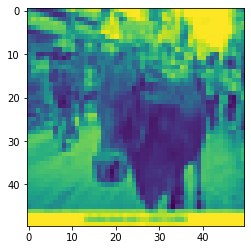

[0 1]

--------------------------------------



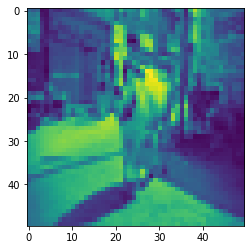

[0 1]

--------------------------------------



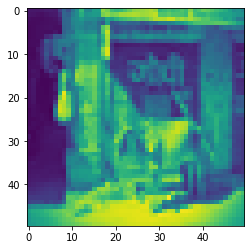

[0 1]

--------------------------------------



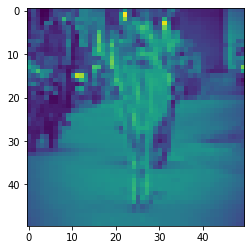

[0 1]

--------------------------------------



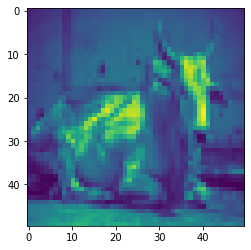

[0 1]

--------------------------------------



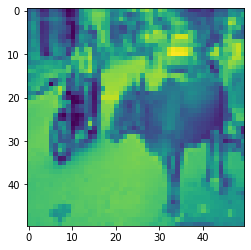

[0 1]

--------------------------------------



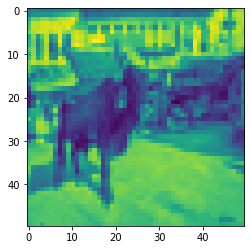

[0 1]

--------------------------------------



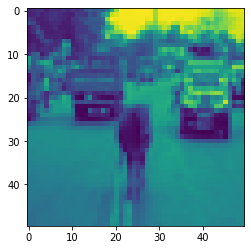

[0 1]

--------------------------------------



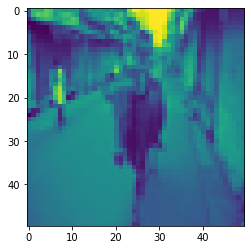

[0 1]

--------------------------------------



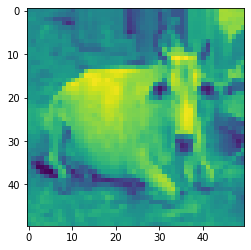

[0 1]

--------------------------------------



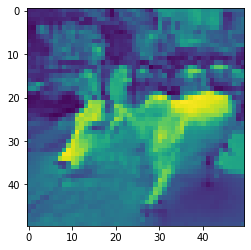

[0 1]

--------------------------------------



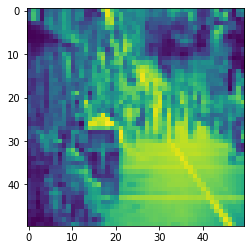

[1 0]

--------------------------------------



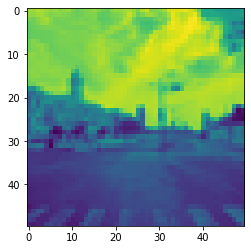

[1 0]

--------------------------------------



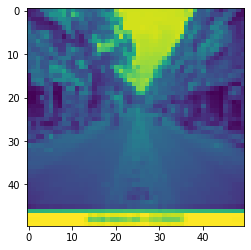

[1 0]

--------------------------------------



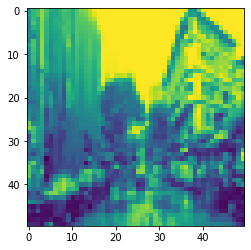

[1 0]

--------------------------------------



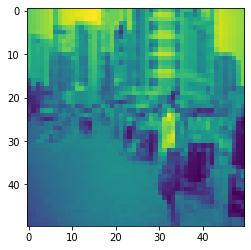

[1 0]

--------------------------------------



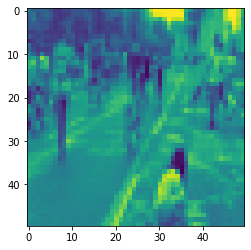

[1 0]

--------------------------------------



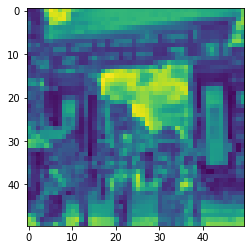

[1 0]

--------------------------------------



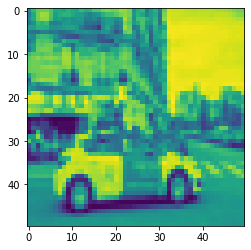

[1 0]

--------------------------------------



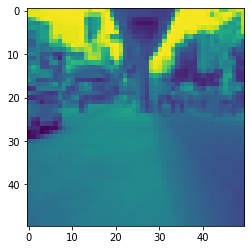

[1 0]

--------------------------------------



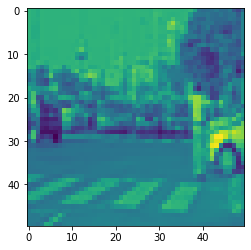

[1 0]

--------------------------------------



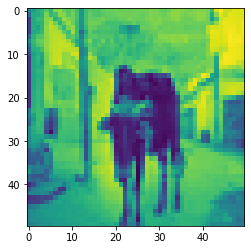

[0 1]

--------------------------------------



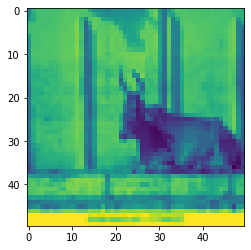

[0 1]

--------------------------------------



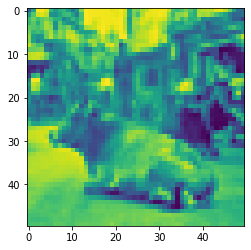

[0 1]

--------------------------------------



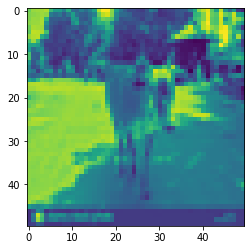

[0 1]

--------------------------------------



In [171]:
print(X.shape)
print(T.shape)
T_old=T.T
for i in range(25):
    pyplot.imshow(IMG[i])
    pyplot.show()
    print(T_old[i])
    print("\n--------------------------------------\n")

In [172]:
n_x = 2500    # num_px*num_px
n_h1 = 500
n_h2 = 50
n_y = 2
layers_dims = (n_x, n_h1, n_h2, n_y)

learning_rates=(0.01,0.05,0.1,0.2,0.4,0.8)
epochs=(30000,20000,14000,7000,4000,2000)

In [173]:
#pre model cell space left empty

In [174]:
def three_layer_model(X, T, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h1, n_h2, n_y) = layers_dims
    
    # Initialize parameters dictionary
    parameters = initialize_parameters(n_x, n_h1, n_h2, n_y)

    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Run Epochs

    for i in range(0, num_iterations):
        
        #Forward Propogation across two layers in ReLu and Sigmoid
        #We store cache here, so that when we come back for backprob, we dont have to unnecessarily compute values again 
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        A3, cache3 = linear_activation_forward(A2, W3, b3, activation='sigmoid')

        #Compute the cost
        cost = compute_cost(A3, T)

        #Our cost function is Mean Square Error
        #derivative of cost wrt dA2 
        dA3 = -2*(T-A3)
#         dA3 = - (np.divide(T, A3) - np.divide(1 - T, 1 - A3))
        
        #backward propogation
        dA2, dW3, db3 = linear_activation_backward(dA3, cache3, activation='sigmoid')
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')

        #fill grads dictionary, to be used for update parameters
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW3'] = dW3
        grads['db3'] = db3
        
        #Update the parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
        
        # Print the cost every 200th epoch 
        if print_cost and i % 50 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 50 == 0:
            costs.append(cost)
    
    return parameters

In [179]:
def predict(parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # plot the cost

#     plt.plot(np.squeeze(costs))
#     plt.ylabel('cost')
#     plt.xlabel('iterations (per tens)')
#     plt.title("Learning rate =" + str(learning_rate))
#     plt.show()
    
    
    X = []
    IMG=[]
    for filename in glob.glob('testcow/*.jpg'): #assuming jpg
        im=Image.open(filename).resize((50,50)).convert('L')
        x=np.floor((np.array(im)).tolist())
        X.append((x).flatten())
        IMG.append(Image.fromarray(x))
    
    X=np.array(X).T
    
    
    
    
    # Forward propagation
    A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
    A3, cache3 = linear_activation_forward(A2, W3, b3, activation='sigmoid')
    
    # Transpose output from (3,15) to (15,3) to make comparision easier
    A3=A3.T
    for case in range(len(A3)):
        pyplot.imshow(IMG[case])
        pyplot.show()
        
        temp=A3[case].tolist()
        ans_idx=temp.index(max(temp))
        
        print(temp)
        if(ans_idx==1):
            print("predicted Cow")
        else:
            print("predicted Not Cow")
        print("\n---------------------------------------------------------------------------------------\n")

In [176]:
# all_parameters=[]

# #This will take some time to run, probably 1-2 minutes
# for i in range(6):
#     print("\n----------------------------------------------------------\n Learning Rate = ",learning_rates[i]," | Epoch =",epochs[i])
    
#     all_parameters.append(three_layer_model(X, T, learning_rate=learning_rates[i],layers_dims = (n_x, n_h1,n_h2, n_y), num_iterations = epochs[i], print_cost=True))
#     print("\n----------------------------------------------------------\n")

In [177]:
all_parameters=three_layer_model(X, T, learning_rate=0.01,layers_dims = (n_x, n_h1,n_h2, n_y), num_iterations = 1000, print_cost=True)

Cost after iteration 0: 0.5002256395523131
Cost after iteration 50: 0.38798635752732735
Cost after iteration 100: 0.2014210040044081
Cost after iteration 150: 0.11411293599662538
Cost after iteration 200: 0.0727188951207575
Cost after iteration 250: 0.051479090408885736
Cost after iteration 300: 0.038707266322041564
Cost after iteration 350: 0.030399134825388585
Cost after iteration 400: 0.025115267567816645
Cost after iteration 450: 0.021301776355589195
Cost after iteration 500: 0.018454508368808895
Cost after iteration 550: 0.016220535244177145
Cost after iteration 600: 0.014426227631105739
Cost after iteration 650: 0.012958758028342128
Cost after iteration 700: 0.0116790713172948
Cost after iteration 750: 0.010399663858709517
Cost after iteration 800: 0.009356181154356099
Cost after iteration 850: 0.008631967279342193
Cost after iteration 900: 0.008020472651142842
Cost after iteration 950: 0.007481389142257842


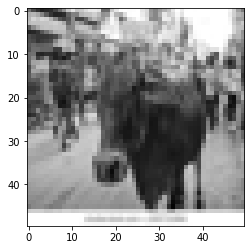

[0.047388580079704874, 0.9538597924407607]
predicted Cow

---------------------------------------------------------------------------------------



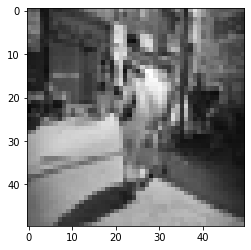

[0.047372718161526176, 0.9538772159005054]
predicted Cow

---------------------------------------------------------------------------------------



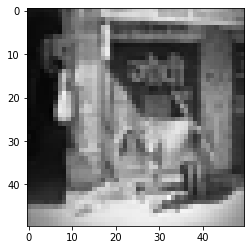

[0.04746358394505729, 0.953804571798409]
predicted Cow

---------------------------------------------------------------------------------------



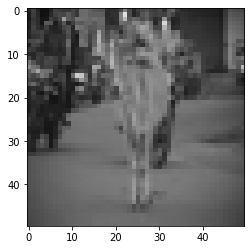

[0.04817218376204121, 0.9530816803996072]
predicted Cow

---------------------------------------------------------------------------------------



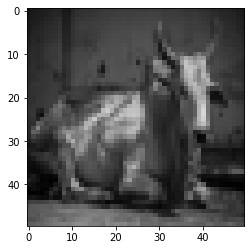

[0.04690698907524659, 0.9533001852469702]
predicted Cow

---------------------------------------------------------------------------------------



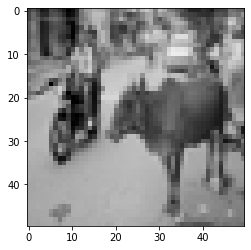

[0.0472894217883553, 0.9539903268149077]
predicted Cow

---------------------------------------------------------------------------------------



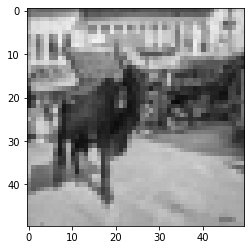

[0.04860932427529006, 0.9519184528280381]
predicted Cow

---------------------------------------------------------------------------------------



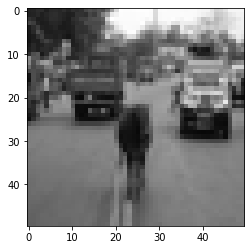

[0.04900583186877441, 0.9516952412296209]
predicted Cow

---------------------------------------------------------------------------------------



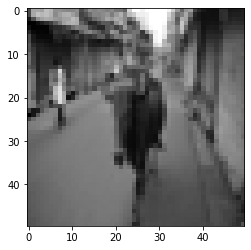

[0.04740475374829627, 0.9536493084380883]
predicted Cow

---------------------------------------------------------------------------------------



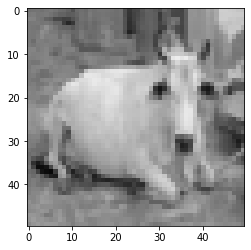

[0.047778001339365356, 0.9535246682274958]
predicted Cow

---------------------------------------------------------------------------------------



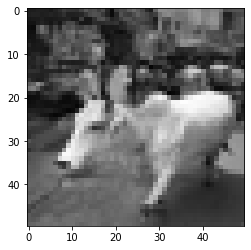

[0.04754533141879389, 0.9537463798051847]
predicted Cow

---------------------------------------------------------------------------------------



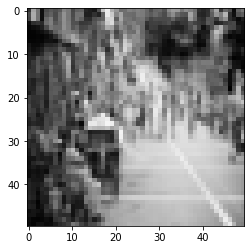

[0.9292289263850741, 0.07069812760403105]
predicted Not Cow

---------------------------------------------------------------------------------------



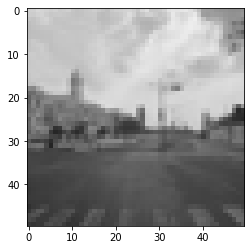

[0.9294218756835683, 0.07049246851061572]
predicted Not Cow

---------------------------------------------------------------------------------------



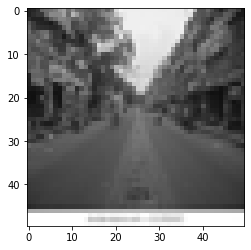

[0.9290999162553817, 0.07081240938490004]
predicted Not Cow

---------------------------------------------------------------------------------------



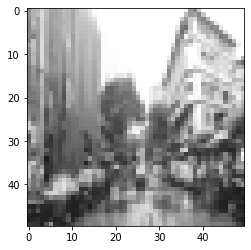

[0.9294125059440936, 0.070515510034389]
predicted Not Cow

---------------------------------------------------------------------------------------



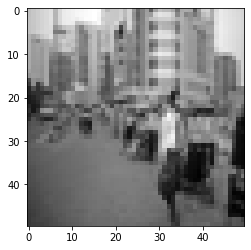

[0.9293953915234473, 0.07052523768597457]
predicted Not Cow

---------------------------------------------------------------------------------------



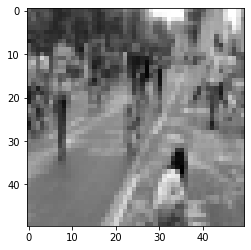

[0.9050894374318611, 0.09460467764220264]
predicted Not Cow

---------------------------------------------------------------------------------------



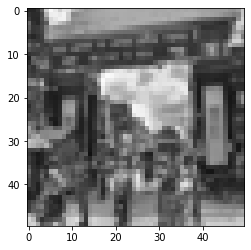

[0.9293315437606325, 0.07060892706281126]
predicted Not Cow

---------------------------------------------------------------------------------------



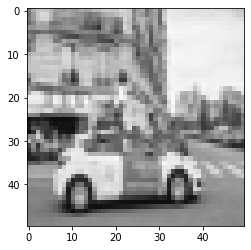

[0.9293222180262218, 0.07055359450520232]
predicted Not Cow

---------------------------------------------------------------------------------------



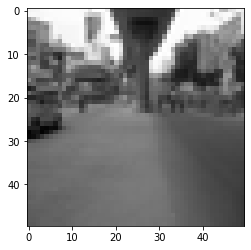

[0.9292094857746154, 0.07075080617703504]
predicted Not Cow

---------------------------------------------------------------------------------------



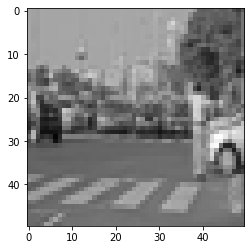

[0.9272283966093415, 0.07361987870843738]
predicted Not Cow

---------------------------------------------------------------------------------------



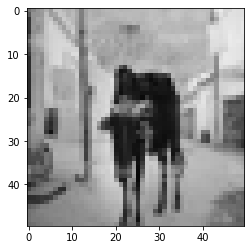

[0.04790901380734531, 0.9529717883551923]
predicted Cow

---------------------------------------------------------------------------------------



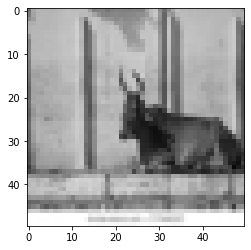

[0.04729977463812484, 0.9539828852321153]
predicted Cow

---------------------------------------------------------------------------------------



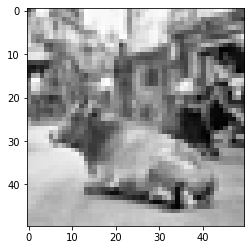

[0.04734412580142987, 0.953943805661307]
predicted Cow

---------------------------------------------------------------------------------------



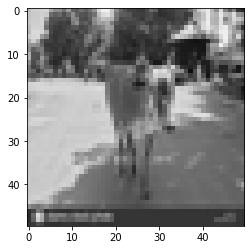

[0.04728795765176608, 0.9539965000225725]
predicted Cow

---------------------------------------------------------------------------------------



In [178]:
predict(all_parameters)#for alpha=0.8